# Tuto 006 : Lumped bladed disk study with a ring damper

In this tutorial an analysis onto a bladed disk will be conducted. The studied bladed disk is modeled using a lumped mass model extracted from [[1]](#1). A sector of the bladed disk can be represented by the following Figure : 

![title](TutoFig/BliskLaxalde2007.PNG)

The parameters are set following the Table below : 

| $m_{0}$ | $k_{0}$ | $k_{G}$ | $m_{b}^{1}$ | $k_{b}^{1}$ | $m_{b}^{2}$ | $k_{b}^{2}$ | $\xi$ |
| :- | :- | :- | :- | :- | :- | :- | :- |
| $1.2$ | $5e7$ | $6e5$ | $3.5e-3$ | $1e6$ | $2.5e-3$ | $2e6$ | $1e-3$ |


The tutorial is organised in three main sections. The correction is given in the python file that comes with the name of this notebook as prefix. The objectives of the notebook are the following : 

1. Linear analysis of the bladed disk : 
    - build the matrices of a sector of the system
    - assemble the matrices in order to obtain the matrices for the whole disk
    - conduct the modal analysis of the bladed disk 
    - select a mode to study with a good enough disk/blade participation ratio such that a ring damper would be efficient
    - build pyHarm linear analysis of the chosen mode in the case of no-ring damper
2. Add the ring damper to the system : 
    - build the matrices for a sector of the ring damper
    - assemble the matrices and run a pyHarm analysis considering the ring is attached through linear springs to the disk
    - introduce friction between the ring and the disk to see the generated damping effect
3. Mountable ring damper : 
    - suppress a sector of ring damper in order to make the ring mountable
    - check response of all the blades and conclude

**References:**

<a id="1">[1]</a> D.Laxalde & F.Thouverez & J.-J.Sinou & J.-P.Lombard. *Qualitative analysis of forced response of blisks with friction ring dampers*. European Journal of Mechanics A/Solids (2007). 26:676-687

# 0. Imports and helper functions

This section is composed of basic imports and helper function that would be used in the tutorial. 

In [1]:
print("Kernel has started if displayed")

Kernel has started if displayed


In [2]:
## This block makes the mandatory imports and configure matplotlib for figures
## Some help function is also define here (get_frf)
import sys
PATH_TO_PYHARM = False
PATH_TO_PYHARM = "../"
if PATH_TO_PYHARM !=False : 
    sys.path.append(PATH_TO_PYHARM)
# ------------------ IMPORTS ------------------ #
import copy
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pyHarm
import pandas as pd 

# ------------------ MATPLOTLIB DEFAULT STYLE ------------------ #
plt.style.use('default')
FONT_BASE = 18
width_fig = 8
ratio_fig = (width_fig,1/(16/10.)*width_fig)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
plt.rc('xtick', labelsize=FONT_BASE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_BASE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_BASE)    # legend fontsize
plt.rc('axes', labelsize=FONT_BASE)
plt.rc('axes', titlesize=FONT_BASE+5) #fontsize of the title

BASE_CMAP_NAME = "RdYlGn_r"
BASE_CMAP = cm.get_cmap(BASE_CMAP_NAME, 2)


style_plots_ref = {"frf_lin":{"linestyle":"dashed","color":np.zeros(3,),\
                          "label":"Linear solution","linewidth":3},\
                   "frf_lin_slide":{"linestyle":"dashed","color":BASE_CMAP(0),\
                          "label":"Linear solution sliding","linewidth":3},\
                   "frf_lin_stuck":{"linestyle":"dashed","color":BASE_CMAP(1),\
                          "label":"Linear solution stuck","linewidth":3},\
                   "frf_fric":{"linestyle":"solid","linewidth":2,"color":np.array([0,140,255])/255.,\
                           "marker":None},\
                  }
SAVE = False

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100. 
import matplotlib.animation
%matplotlib notebook

# ------------------ helper functions ------------------ #
def get_frf(M,indices_selection=('sub1', 0, 0),analysis="FRF"): 
    indexH = M.getIndex(*indices_selection)
    SA = [sol for sol in M.nls[analysis].SolList if sol.flag_accepted]
    om = np.array([sol.x[-1] for sol in SA])
    ampH = np.array([np.linalg.norm(sol.x[indexH]) for sol in SA])
    return SA,om,ampH


def prep_fig(fp):
    fig,ax = plt.subplots(figsize=ratio_fig)
    ax.set_xticks(fp)
    ax.set_xticklabels([f"{f:.2e}" for f in fp])
    ax.grid()
    ax.set_yscale("log")
    return fig,ax

## 1. Linear analysis of the bladed disk : 

### 1.1 Build the rigidity and mass matrix for a single sector : 

In the following block, we aim to construct the mass matrix and rigidity matrix for a single sector of the blisk. The ring damper is not yet taken into account.

To complete the task, please modify the following functions:

- `get_sector_mass_mat`: This function should return the sector mass matrix.
- `get_sector_rigid_mat`: This function should return the sector rigidity matrix.

Make sure to maintain the numbering of the masses correspond to their respective positions in the matrices.

In [3]:
######################### Parameters
m0 = 1.2
kg = 6e5
mb1 = 350e-3
mb2 = 250e-3
kb1 = 1e6
kb2 = 2e6


######################### Functions to complete
def get_sector_mass_mat(m0,mb1,mb2) :
    Ms = np.zeros((3,3))
    # complete mass matrix below
    return Ms

def get_sector_rigid_mat(kg,kb1,kb2) : 
    Ks = np.zeros((3,3))
    # complete rigidity matrix below
    return Ks

######################### Build mass and rigidity mattrices
from Tuto_006_LumpedBladedDisk_correctionfunctions import get_sector_mass_mat_corr,get_sector_rigid_mat_corr
M_sector, K_sector = get_sector_mass_mat_corr(m0,mb1,mb2), get_sector_rigid_mat_corr(kg,kb1,kb2)

print("K_sector = \n", K_sector)

K_sector = 
 [[ 1600000. -1000000.        0.]
 [-1000000.  3000000. -2000000.]
 [       0. -2000000.  2000000.]]


### 1.2 Construction of the full blisk
In the next block, we will construct the mass matrix and rigidity matrix for the entire blisk. The ring damper is not yet taken into account.

To complete the task, please modify the following functions:

- `get_full_mass_mat`: This function should return the full mass matrix for the blisk. You should use the sector mass matrix M_sector that you have already defined.
- `get_full_rigid_mat`: This function should return the full rigidity matrix for the blisk. You should use the sector rigidity matrix K_sector and the parameter $k_{0}$ to link the sectors together.

Make sure to consider the correct positions when assembling the sector matrices into the full matrices.

In [4]:
######################### Parameters
N_SECTOR = 24 #original N_SECTOR=24
k0 = 5e7


######################### Functions to complete
def get_full_mass_mat(M_sector, n_sector = N_SECTOR) : 
    M = np.zeros((n_sector*M_sector.shape[0], n_sector*M_sector.shape[1]))
    # Complete the matrix (tips: you can use np.kron)
    return M
def get_full_rigid_mat(K_sector, k0=k0, n_sector = N_SECTOR) : 
    K = np.zeros((n_sector*M_sector.shape[0], n_sector*M_sector.shape[1]))
    # Complete the matrix (tips: you can use np.kron)
    return K

######################### Build mass and rigidity mattrices
from Tuto_006_LumpedBladedDisk_correctionfunctions import get_full_mass_mat_corr,get_full_rigid_mat_corr
M = get_full_mass_mat_corr(M_sector, N_SECTOR)
K = get_full_rigid_mat_corr(K_sector, k0, N_SECTOR)


######################### Construction of a DataFrame to help with dof finding
explicit_dofs = pd.DataFrame({"sub":[i//3 for i in range(len(M))],
                              "node":[i%3 for i in range(len(M))]})
print("explicit_dofs = \n", explicit_dofs)

explicit_dofs = 
     sub  node
0     0     0
1     0     1
2     0     2
3     1     0
4     1     1
..  ...   ...
67   22     1
68   22     2
69   23     0
70   23     1
71   23     2

[72 rows x 2 columns]


### 1.3 Modal analysis for the blisk : 

**Modal Analysis**

In the next block, we will perform the modal analysis of the mass and rigidity matrix.

To complete the task, please modify the following functions:

- `get_M_inv`: This function should compute the inverse of the mass matrix.
- `make_eig`: This function should perform the eigenvalue analysis and return the eigen frequencies and eigen vectors sorted in increasing order of frequency.
Make sure to consider the correct data types and outputs as specified.

In [5]:
######################### Functions to complete

def get_M_inv(M=M):
    M_inv = np.zeros(M.shape)
    return M_inv

######################### Build inverse of Mass matrix
from Tuto_006_LumpedBladedDisk_correctionfunctions import get_M_inv_corr
M_inv = get_M_inv_corr(M)

print("M_inv @ M == np.eye(M.shape[0]) ? : ", np.isclose(M_inv @ M, np.eye(M.shape[0])).all())

M_inv @ M == np.eye(M.shape[0]) ? :  True


In [6]:
######################### Functions to complete
def make_eig(M_inv=M_inv, K=K) : 
    om2, phi = np.zeros(M.shape[0]), np.zeros(M.shape)
    f = np.zeros(om2.shape)
    # compute eigen vectors and values using np.linalg.eig
    
    # get the index of sorting using np.argsort
    
    # apply the sorting index to om2 and phi (for phi the columns needs to be sorted)
    
    # get the vector of frequencies f 
    
    # Keep only the real part
    f, phi = np.real(f), np.real(phi)
    return f,phi
    

######################### Build mass and rigidity mattrices
from Tuto_006_LumpedBladedDisk_correctionfunctions import make_eig_corr
f, phi = make_eig_corr(M_inv, K)

# Degenerate modes shall be seen (modes with same frequencies)
print("Sorted frequencies : \n", f)

Sorted frequencies : 
 [  88.26374399  169.3441295   169.3441295   189.3018526   189.3018526
  193.0496227   193.0496227   194.33310084  194.33310084  194.91823247
  194.91823247  195.23065575  195.23065575  195.41408815  195.41408815
  195.52784525  195.52784525  195.59979933  195.59979933  195.64415084
  195.64415084  195.66835088  195.66835088  195.67605066  249.31165161
  335.56537939  335.56537939  555.31017863  555.31017863  615.15017797
  615.15017797  616.585022    616.585022    616.96341859  616.96341859
  617.12696788  617.12696788  617.21324764  617.21324764  617.2635722
  617.2635722   617.29423701  617.29423701  617.31270821  617.31270821
  617.32265229  617.32265229  617.32579659  619.34330474  619.82021678
  619.82021678  626.2025859   626.2025859   810.0067968   810.0067968
 1044.51877441 1044.51877441 1264.6832341  1264.6832341  1464.72871426
 1464.72871426 1640.60424871 1640.60424871 1789.01493852 1789.01493852
 1907.27068187 1907.27068187 1993.2626374  1993.2626374  

**Nodal Diameter**

In the next block the concept of nodal diameter will be introduced. This concept is born from the analysis of the eigenvectors. 

- Complete `get_m2_indexes` function that extract the index of the second mass for each sector using the **explicit_dofs** DataFrame

In [7]:
######################### Functions to complete
def get_m2_indexes(node=2, explicit_dofs=explicit_dofs) : 
    indexes = explicit_dofs.index
    # Use DataFrame to catch the index of all the m2 masses of each sector
    return indexes

######################### get index of each m2 dof for all the sectors
from Tuto_006_LumpedBladedDisk_correctionfunctions import get_m2_indexes_corr
indexes_m2 = get_m2_indexes_corr(2, explicit_dofs)
print("indexes_m2 = \n", indexes_m2)

indexes_m2 = 
 Int64Index([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50,
            53, 56, 59, 62, 65, 68, 71],
           dtype='int64')


In the next block, we will use pyHarm DFT matrix in order to see the spatial harmonic content of each mode.

- Complete `get_phi_m2` function that returns the eigenvector phi limited to m2 dofs only

In [8]:
######################### Functions to complete


def get_phi_m2(phi=phi, indexes_m2=indexes_m2) : 
    phi_2 = phi[indexes_m2,:]
    return phi_2

######################### get eigen vector for m2 only
from Tuto_006_LumpedBladedDisk_correctionfunctions import get_phi_m2_corr
phi_2 = get_phi_m2_corr(phi, indexes_m2)

This next block is used to study the spatial frequency content of the mode shapes. A discrete Fourier Transform operator is used in a spatial context to obtain the spatial harmonic content. Then the norm of the mode shape is computed per harmonic in order to associate a nodal number to each mode.

- No modification is expected by the user here

In [9]:
######################### Parameters
N_DIAM = 12 # N_DIAM = 12
from pyHarm.DynamicOperator import compute_DFT
spacial_harmonic_operator = compute_DFT(N_SECTOR, N_DIAM+1)["tf"] # This is the transformation matrix that 

######################### get the harmonic content
def get_harm_content(phi_2=phi_2, sho=spacial_harmonic_operator) : 
    harm_content = np.zeros((phi_2.shape[1],spacial_harmonic_operator.shape[1]))
    for k in range(phi_2.shape[1]) : 
        harm_content[k,:] = phi_2[:,k] @ sho
    return harm_content

harm_content = get_harm_content(phi_2, spacial_harmonic_operator)


######################### get the norm for each harmonic
def get_norm_per_harm(harm_content=harm_content, threshold=1e-5):
    norm = np.zeros((harm_content.shape[0],(harm_content.shape[1]-1)//2))
    for k,h in enumerate(harm_content) : 
        for j in range((harm_content.shape[1]-1)//2) : 
            if j == 0 : 
                norm[k,j] = np.abs(h[j])
            else : 
                norm[k,j] = np.linalg.norm(h[1+2*(j-1):3+2*(j-1)])
    norm[norm<=threshold] = 0.
    return norm

norm = get_norm_per_harm(harm_content)
diam_num = np.argmax(norm,axis=1)
pd_diam = pd.DataFrame({"freq":f, "diam_num":diam_num})
pd_diam

freq  diam_num
0     88.263744         0
1    169.344130         1
2    169.344130         1
3    189.301853         2
4    189.301853         2
..          ...       ...
67  1993.262637        10
68  1993.262637        10
69  2045.470557        11
70  2045.470557        11
71  2062.975678        12

[72 rows x 2 columns]

In the next block, we will use the previously constructed DataFrame `pd_diam` in order to separate the families. The main goal is to be able to reproduce the following graphic from Laxalde article.

![title](TutoFig/NodalLaxalde2007.PNG)


- Complete `get_families_from_diam` function that returns as much families as necessary.

<IPython.core.display.Javascript object>


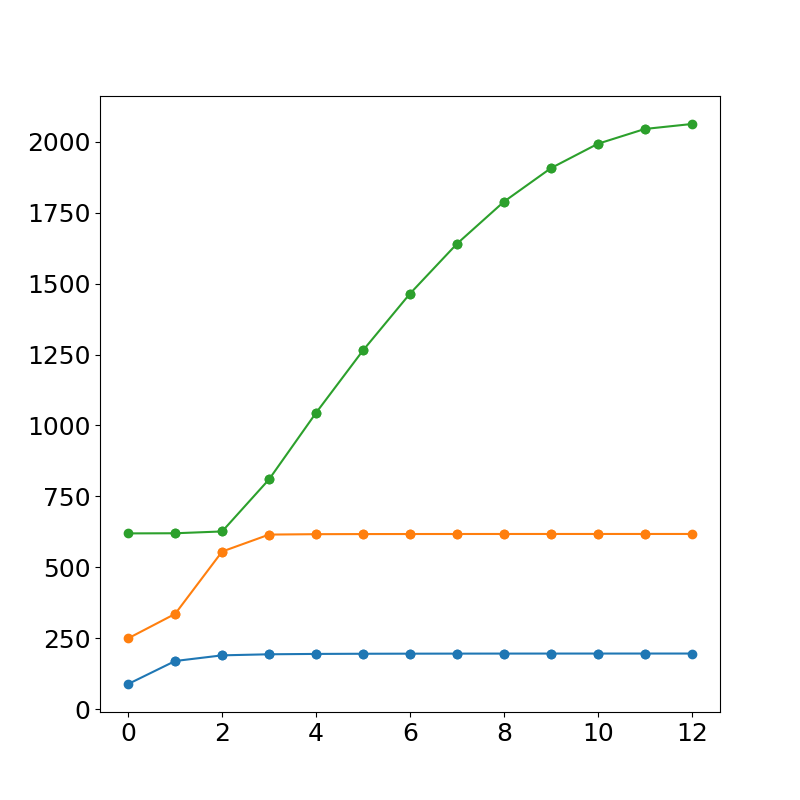

In [10]:
######################### Functions to complete
def get_families_from_diam(pd_diam=pd_diam) :
    list_fam = []
    return list_fam

######################### get the norm for each harmonic
from Tuto_006_LumpedBladedDisk_correctionfunctions import get_families_from_diam_corr
list_fam = get_families_from_diam_corr(pd_diam)

fig, ax = plt.subplots(1,1,figsize=(8,8))
for l in list_fam : 
    plt.plot(l["diam_num"], l["freq"], "-o")

**Animation of the mode shape** 

The next block provides some functions in order to obtain the animation of the mode shape. This might be helpful to see the nodal diameter concept and the diameter that are not moving. You can play with the mode to display in order to see the different mode shapes.

*The generation of the animation can take a bit of time, be patient*

<IPython.core.display.Javascript object>


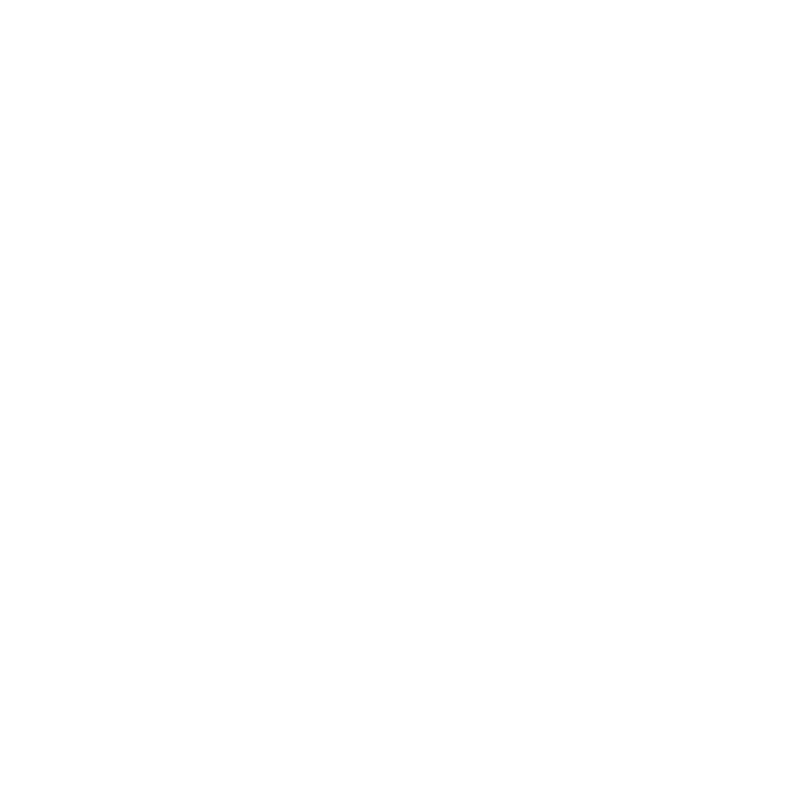

In [11]:
######################### Change mode to be displayed in the animation
DISPLAYED_MODE_SHAPE = 2

######################### Functions to make the animation (no completion is needed)
phi_stud = phi_2[:,DISPLAYED_MODE_SHAPE]
max_amp = np.max(np.abs(phi_stud))
cmapcall = matplotlib.colormaps['RdYlBu_r'].resampled(50)
Radius = 5e0
angle_sector = 2*np.pi/N_SECTOR
rotation_mat = np.array([[np.cos(angle_sector),np.sin(angle_sector)],[-np.sin(angle_sector),np.cos(angle_sector)]])
s0 = np.array([[0,Radius]])

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-1.1*Radius,1.1*Radius])
ax.set_ylim([-1.1*Radius,1.1*Radius])
ax.scatter(0,0,s=100,color="k")

def app_rot_mat(s0, n, angle_sector) : 
    rotation_mat = np.array([[np.cos(n*angle_sector),np.sin(n*angle_sector)],[-np.sin(n*angle_sector),np.cos(n*angle_sector)]])
    return s0@rotation_mat

def get_s_pos(s0, n, angle_sector, phi, rad=0) : 
    sni = s0 + np.array([[phi[n]*np.cos(rad),0]])
    sn = app_rot_mat(sni, n, angle_sector)
    return sn, phi[n]*np.cos(rad)

TOTAL_FRAMES = 60
rad_per_frame = 2*np.pi / TOTAL_FRAMES

def animate(frame) : 
    radian = rad_per_frame * frame
    ax.clear()
    ax.scatter(0,0,s=100,color="k")
    for sect in range(N_SECTOR) : 
        si, ai = get_s_pos(s0, sect, angle_sector, phi_stud, rad=radian)
        ax.scatter(si[0,0],si[0,1],s=200,color=cmapcall(np.abs(ai)/max_amp))


######################### Create animation
matplotlib.animation.FuncAnimation(fig, animate, frames=60, interval = 33)

In [19]:
fig.clear()

### 1.4. Mode Selection for the ring : 
The damping effect of a ring damper comes from the friction between the disk and the ring. Therefore, a ring damper can only be effective for modes where the participation of the disk is sufficiently high. In this subsection, we will check which mode is suitable for a ring damper by examining the mode shape we have previously calculated.

The main goal is to select modes that have a balanced distribution of movement between the tip of the blades and the disk.

To extract the mode shape for the disk, you can follow a similar approach to Section 1.3. Specifically, you can reuse the `get_phi_m2` and `get_m2_indexes functions`.

pd_diam = 
            freq  diam_num
0     88.263744         0
1    169.344130         1
2    169.344130         1
3    189.301853         2
4    189.301853         2
..          ...       ...
67  1993.262637        10
68  1993.262637        10
69  2045.470557        11
70  2045.470557        11
71  2062.975678        12

[72 rows x 2 columns]


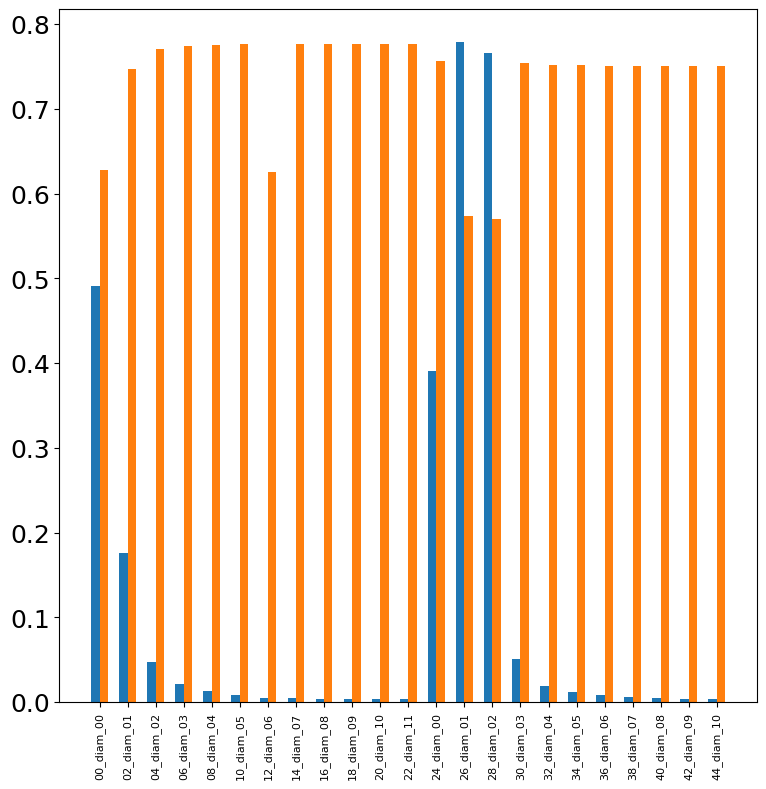

In [21]:
%matplotlib inline
######################### Get phi for the node=0
ii_0 = get_m2_indexes_corr(node=0, explicit_dofs=explicit_dofs)
phi_0 = get_phi_m2_corr(phi, ii_0)
ii_1 = get_m2_indexes_corr(node=1, explicit_dofs=explicit_dofs)
phi_1 = get_phi_m2_corr(phi, ii_1)


######################### ratio calculation : 
disk_ratio = np.linalg.norm(phi_0 ,axis=0)[0:46:2]
tip_ratio = np.linalg.norm(phi_2 ,axis=0)[0:46:2]


fig, ax = plt.subplots(1,1,figsize=(9,9))
ax.bar(np.arange(0,disk_ratio.shape[0])-.15, disk_ratio, width=.3)
ax.bar(np.arange(0,disk_ratio.shape[0])+.15, tip_ratio, width=.3)
ax.set_xticks([i for i in range(disk_ratio.shape[0])])
ax.set_xticklabels([f"{2*i:02d}_diam_{(pd_diam['diam_num'].iloc[2*i]):02d}" for i in range(disk_ratio.shape[0])],
                   rotation=90, fontsize=8)
print("pd_diam = \n",pd_diam)

### 1.4 Construction of the damping matrix using modal damping

We are now going to be able to study the forced response of this structure. But first it is necessary to build the damping matrix associated with this problem.
For constant modal damping $\xi$, the associated damping diagonal matrix projected into the modal basis is given by : 

$$ \mathbb{C}^{modal} = \begin{bmatrix} 
\ddots & ~ \\
 & 2\omega_{j}\xi & \\
 & & \ddots \\
\end{bmatrix} $$

In the physical space, one can use the transform matrix $\phi$ : 

$$ \mathbb{C}^{phy} = \phi \cdot \mathbb{C}^{modal} \cdot \phi^{T} $$

In [22]:
######################### Parameters
xi_damp = 1e-3

######################### Functions to complete
def get_damping_mat(xi_damp=xi_damp, phi=phi, pd_diam=pd_diam) : 
    C = np.zeros(phi.shape)
    return C

######################### get the damping matrix
from Tuto_006_LumpedBladedDisk_correctionfunctions import get_damping_mat_corr
C = get_damping_mat_corr(xi_damp, phi, pd_diam)

print("C for 1st sector = \n", C[0:3,0:3])

C for 1st sector = 
 [[16.25535879 -0.64683937 -0.1247872 ]
 [-0.64683937  4.54963291 -2.74668044]
 [-0.1247872  -2.74668044  6.15721163]]


### 1.5 Forced response linear full slip :

**Build of the Substructure**

- Complete `make_blisk_sub` function that generates a dictionary that creates the substructure with pyHarm format of input

In [23]:
######################### Functions to complete

def make_blisk_sub(M,C,K) : 
    Linsys = dict() # G matrix is a necessary input to be set to 0 matrix
    Blisk = {"matrix":Linsys, "ndofs":1}
    return Blisk


######################### Set up the substructure of the blisk
from Tuto_006_LumpedBladedDisk_correctionfunctions import make_blisk_sub_corr
Blisk = make_blisk_sub_corr(M,C,K)
Blisk

{'matrix': {'M': array([[1.2 , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.35, 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.25, ..., 0.  , 0.  , 0.  ],
         ...,
         [0.  , 0.  , 0.  , ..., 1.2 , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.35, 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.25]]),
  'C': array([[16.25535879, -0.64683937, -0.1247872 , ..., -5.48095529,
          -0.12295347, -0.13556014],
         [-0.64683937,  4.54963291, -2.74668044, ..., -0.12295347,
           0.14833617, -0.1420831 ],
         [-0.1247872 , -2.74668044,  6.15721163, ..., -0.13556014,
          -0.1420831 ,  0.26124239],
         ...,
         [-5.48095529, -0.12295347, -0.13556014, ..., 16.24783237,
          -0.659279  , -0.14548109],
         [-0.12295347,  0.14833617, -0.1420831 , ..., -0.659279  ,
           4.26647669, -2.68467329],
         [-0.13556014, -0.1420831 ,  0.26124239, ..., -0.14548109,
          -2.68467329,  5.77734058]]),
  'K': array

**Build of the System**

- Complete `make_system` function that generates a dictionary that creates the system of type "Base"

In [24]:
######################### Functions to complete
def make_system_input(nh=1,nti=128):
    System = dict()
    return System

######################### Set up te system
from Tuto_006_LumpedBladedDisk_correctionfunctions import make_system_input_corr
System = make_system_input_corr(nh=1,nti=128)
System

{'type': 'Base', 'nh': 1, 'nti': 128}

**Build of the Analysis**

- Complete `make_analysis` function that generates a dictionary that creates the analysis of type "frf" with "study" keyword

In [25]:
######################### Parameters
diam_stud = 1

######################### Functions to complete

def make_analysis(puls_inf, puls_sup, ds_min, ds_max, ds0, **kwargs) : 
    FRF = dict()
    # Complete FRF with the parameters given as input
    
    # this will allow us to pass a complementary keyword when willing to make changes in the analysis
    # kwargs = corrector="nocontinuation" would change corection to angular frequency constant
    for k,v in kwargs.items() : 
        FRF[k] = v
    return FRF



######################### Build the analysis : 
fam = list_fam[0]
freq_res = fam[fam["diam_num"]==diam_stud]["freq"].iloc[0]
freq_range_ratio = .05
puls_inf = freq_res*(1-freq_range_ratio) * (2*np.pi)
puls_sup = freq_res*(1+freq_range_ratio+.05) * (2*np.pi)
sol_min_expected = 400.
ds_max = (puls_sup - puls_inf) / sol_min_expected
ds0 = ds_max
ds_min = ds_max * (2**(-6))

from Tuto_006_LumpedBladedDisk_correctionfunctions import make_analysis_corr
FRF = make_analysis_corr(puls_inf,puls_sup,ds_min,ds_max,ds0, solver="MoorePenrose")
FRF

{'study': 'frf',
 'puls_inf': 1010.8195190228167,
 'puls_sup': 1170.422600973788,
 'ds_min': 0.0062344953887098105,
 'ds_max': 0.39900770487742787,
 'ds0': 0.39900770487742787,
 'solver': 'MoorePenrose'}

**Build of the forcing** : 

- Complete `make_forcing` function that generates the forcing onto each $m_2$ node (you can use explicit_dofs in order to know the dof number which is associated with each $m_2$ mass). The phase lag to impose is given by the function `get_dephase` depending on the number of sectors, the nodal diameter that we want to load and the sector number of study.

In [26]:
######################### Functions
def get_dephase(num_sector, n_sector=N_SECTOR, n_diam=diam_stud): 
    dephase = 2*np.pi/n_sector * n_diam * num_sector
    return dephase


######################### Functions to complete : 

def make_forcing(n_sector=N_SECTOR, n_diam=diam_stud, explicit_dofs=explicit_dofs) : 
    Forcing = dict()
    for n in range(n_sector):
        name_forcing = f"F_{n:03d}"
        dephase = 0. # to modify
        applied_node = np.array([]) # to modify
        Forcing[name_forcing] = dict() # to modify
    return Forcing

######################### get the Forcing connectors to apply 
from Tuto_006_LumpedBladedDisk_correctionfunctions import make_forcing_corr
Forcing = make_forcing_corr(N_SECTOR, diam_stud, explicit_dofs)
Forcing

{'F_000': {'type': 'GOForcing',
  'connect': {'blisk': [2]},
  'dirs': [0],
  'amp': 1.0,
  'dto': 0,
  'ho': 1,
  'phi': 0.0},
 'F_001': {'type': 'GOForcing',
  'connect': {'blisk': [5]},
  'dirs': [0],
  'amp': 1.0,
  'dto': 0,
  'ho': 1,
  'phi': 0.2617993877991494},
 'F_002': {'type': 'GOForcing',
  'connect': {'blisk': [8]},
  'dirs': [0],
  'amp': 1.0,
  'dto': 0,
  'ho': 1,
  'phi': 0.5235987755982988},
 'F_003': {'type': 'GOForcing',
  'connect': {'blisk': [11]},
  'dirs': [0],
  'amp': 1.0,
  'dto': 0,
  'ho': 1,
  'phi': 0.7853981633974483},
 'F_004': {'type': 'GOForcing',
  'connect': {'blisk': [14]},
  'dirs': [0],
  'amp': 1.0,
  'dto': 0,
  'ho': 1,
  'phi': 1.0471975511965976},
 'F_005': {'type': 'GOForcing',
  'connect': {'blisk': [17]},
  'dirs': [0],
  'amp': 1.0,
  'dto': 0,
  'ho': 1,
  'phi': 1.308996938995747},
 'F_006': {'type': 'GOForcing',
  'connect': {'blisk': [20]},
  'dirs': [0],
  'amp': 1.0,
  'dto': 0,
  'ho': 1,
  'phi': 1.5707963267948966},
 'F_007': {

**Let's run the forced response analysis**

In [27]:
######################### Full INPUT 
INP = {
    "analysis":{
        "FRF":FRF
    },
    "system":System,
    "substructures":{
        "blisk":Blisk
    },
    "connectors":Forcing
}

S = pyHarm.Maestro(INP)
S.operate()

solution converged at om=1010.8195190228167
solution converged at om=1011.2185267276934
solution converged at om=1011.6175344325701
solution converged at om=1012.0165421374468
solution converged at om=1012.4155498423235
solution converged at om=1012.8145575472001
solution converged at om=1013.2135652520767
solution converged at om=1013.6125729569533
solution converged at om=1014.0115806618298
solution converged at om=1014.4105883667064
solution converged at om=1014.8095960715829
solution converged at om=1015.2086037764593
solution converged at om=1015.6076114813358
solution converged at om=1016.0066191862122
solution converged at om=1016.4056268910886
solution converged at om=1016.8046345959649
solution converged at om=1017.2036423008412
solution converged at om=1017.6026500057175
solution converged at om=1018.0016577105937
solution converged at om=1018.4006654154699
solution converged at om=1018.799673120346
solution converged at om=1019.1986808252221
solution converged at om=1019.597

solution converged at om=1085.832967346585
solution converged at om=1086.2319750514403
solution converged at om=1086.630982756297
solution converged at om=1087.0299904611552
solution converged at om=1087.4289981660143
solution converged at om=1087.8280058708747
solution converged at om=1088.227013575736
solution converged at om=1088.6260212805985
solution converged at om=1089.0250289854619
solution converged at om=1089.4240366903261
solution converged at om=1089.8230443951911
solution converged at om=1090.2220521000568
solution converged at om=1090.621059804923
solution converged at om=1091.0200675097901
solution converged at om=1091.4190752146576
solution converged at om=1091.8180829195258
solution converged at om=1092.2170906243944
solution converged at om=1092.6160983292634
solution converged at om=1093.015106034133
solution converged at om=1093.414113739003
solution converged at om=1093.8131214438733
solution converged at om=1094.212129148744
solution converged at om=1094.611136853

solution converged at om=1160.8464158631057
solution converged at om=1161.2454235679832
solution converged at om=1161.6444312728606
solution converged at om=1162.043438977738
solution converged at om=1162.4424466826156
solution converged at om=1162.841454387493
solution converged at om=1163.2404620923705
solution converged at om=1163.639469797248
solution converged at om=1164.0384775021255
solution converged at om=1164.437485207003
solution converged at om=1164.8364929118804
solution converged at om=1165.235500616758
solution converged at om=1165.6345083216354
solution converged at om=1166.0335160265129
solution converged at om=1166.4325237313903
solution converged at om=1166.8315314362678
solution converged at om=1167.2305391411453
solution converged at om=1167.6295468460228
solution converged at om=1168.0285545509003
solution converged at om=1168.4275622557777
solution converged at om=1168.8265699606552
solution converged at om=1169.2255776655327
solution converged at om=1169.6245853

**Forced response results**

An exemple of forced response is given for the first sector for the $m_2$ mass. Complete it so that every sector is represented. All the sectors shall exhibit the same amplitude. 

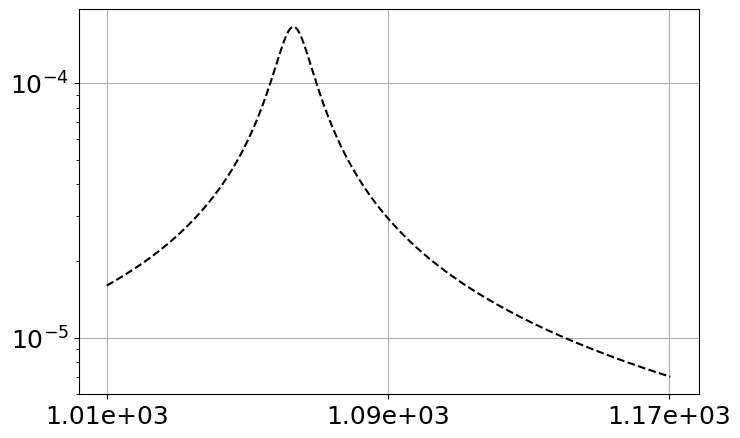

In [28]:
SA,om,amp = get_frf(S,indices_selection=('blisk', 2, 0),analysis="FRF")
fig, ax = prep_fig(np.linspace(puls_inf,puls_sup,3))
ax.plot(om, amp, "k--")

## 2. Adding of the ring damper :

In this section, the ring damper will be added to the system. Instead of building a single substructure representing the whole ring. Sections will be added one by one as new substructures. This will allow for easier manipulations in section 3 of the tutorial.

### 2.1 Construction of sector mass and rigidity

- Complete `make_ring_sector_sub_dict` functions that returns a dictionary that describe a substructure in pyHarm

In [29]:
######################### Parameters : 
mr = 20e-4

######################### Functions to complete 
Mrs = np.array([[mr]])

def make_ring_sector_sub_dict(Mrs=Mrs) : 
    Sector_ring = dict()
    return Sector_ring

######################### Build the dictionary that corresponds to a sector of the ring to be added as a substructure
from Tuto_006_LumpedBladedDisk_correctionfunctions import make_ring_sector_sub_dict_corr 
Sector_ring = make_ring_sector_sub_dict_corr(Mrs)


### 2.2 Add all the sectors to into the input dictionary and create the connexions : 

Using the helper functions given and looping over the sectors, complete the input dictionary `INP_ring_stuck` such that : 

1. The ring sectors are added as substructures to the input dict
2. The sectors of ring are attached to the blisk with a linear spring of rigidity $k_{r}*1e1$
3. The sector n of ring is attached to the next one with a linear spring of rigidity $k_{r}$
3. The sector n of ring is attached to the ground with a linear spring of rigidity $k_{r}*1e-3$ (This spring is added to avoid any rigid body movement of the ring that would make the system ill-conditioned)

- Complete the function `add_ring_to_input` in order to fill the input dictionary following the instructions

In [30]:
######################### Parameters :
kr = 1e7
INP_ring_stuck = copy.deepcopy(INP)


######################### Helper functions : 
def get_ring_sector_numerotation(n, n_sector = N_SECTOR) : 
    sector_str = f"{n:03d}" 
    sector_plus_one = (n+1)%n_sector
    sector_plus_one_str = f"{sector_plus_one:03d}"
    return sector_str, sector_plus_one_str
    
def get_blisk_node_to_attach(n, explicit_dofs = explicit_dofs) :
    node_blisk = np.array([explicit_dofs[((explicit_dofs["node"]==0) & 
                                (explicit_dofs["sub"]==n))].index])[0,0]
    return node_blisk

######################### Functions to complete : 
def add_ring_to_input(inp=INP_ring_stuck, n_sector=N_SECTOR, explicit_dofs = explicit_dofs, kr=kr, Sector_ring=Sector_ring) : 
    for n in range(n_sector) :
        pass
    return inp 
        
######################### Modify INP_stuck_ring accordingly :  
from Tuto_006_LumpedBladedDisk_correctionfunctions import add_ring_to_input_corr 
INP_ring_stuck = add_ring_to_input_corr(INP_ring_stuck, N_SECTOR, explicit_dofs, kr, Sector_ring)



In [31]:
T = pyHarm.Maestro(INP_ring_stuck)
T.operate()

solution converged at om=1010.8195190228167
solution converged at om=1011.218526727694
solution converged at om=1011.6175344325712
solution converged at om=1012.0165421374485
solution converged at om=1012.4155498423257
solution converged at om=1012.814557547203
solution converged at om=1013.2135652520802
solution converged at om=1013.6125729569575
solution converged at om=1014.0115806618347
solution converged at om=1014.410588366712
solution converged at om=1014.8095960715892
solution converged at om=1015.2086037764665
solution converged at om=1015.6076114813437
solution converged at om=1016.006619186221
solution converged at om=1016.4056268910982
solution converged at om=1016.8046345959755
solution converged at om=1017.2036423008527
solution converged at om=1017.60265000573
solution converged at om=1018.0016577106072
solution converged at om=1018.4006654154845
solution converged at om=1018.7996731203617
solution converged at om=1019.198680825239
solution converged at om=1019.597688530

solution converged at om=1086.231975224884
solution converged at om=1086.6309829268778
solution converged at om=1087.029990628424
solution converged at om=1087.4289983294673
solution converged at om=1087.8280060299537
solution converged at om=1088.2270137298358
solution converged at om=1088.6260214290794
solution converged at om=1089.0250291276723
solution converged at om=1089.4240368256346
solution converged at om=1089.8230445230288
solution converged at om=1090.2220522199661
solution converged at om=1090.621059916607
solution converged at om=1091.0200676130871
solution converged at om=1091.4190753097478
solution converged at om=1091.8180830067204
solution converged at om=1092.2170907041589
solution converged at om=1092.6160984021776
solution converged at om=1093.015106100846
solution converged at om=1093.4141138001894
solution converged at om=1093.813121500197
solution converged at om=1094.2121292008324
solution converged at om=1094.6111369020423
solution converged at om=1095.0101446

solution converged at om=1161.644431297722
solution converged at om=1162.0434390025991
solution converged at om=1162.4424467074764
solution converged at om=1162.8414544123536
solution converged at om=1163.240462117231
solution converged at om=1163.6394698221081
solution converged at om=1164.0384775269854
solution converged at om=1164.4374852318626
solution converged at om=1164.83649293674
solution converged at om=1165.2355006416171
solution converged at om=1165.6345083464944
solution converged at om=1166.0335160513716
solution converged at om=1166.4325237562489
solution converged at om=1166.8315314611261
solution converged at om=1167.2305391660034
solution converged at om=1167.6295468708806
solution converged at om=1168.0285545757579
solution converged at om=1168.4275622806351
solution converged at om=1168.8265699855124
solution converged at om=1169.2255776903896
solution converged at om=1169.6245853952669
solution converged at om=1170.0235931001441
solution converged at om=1170.422600

169.32296147089713 173.51422867859807


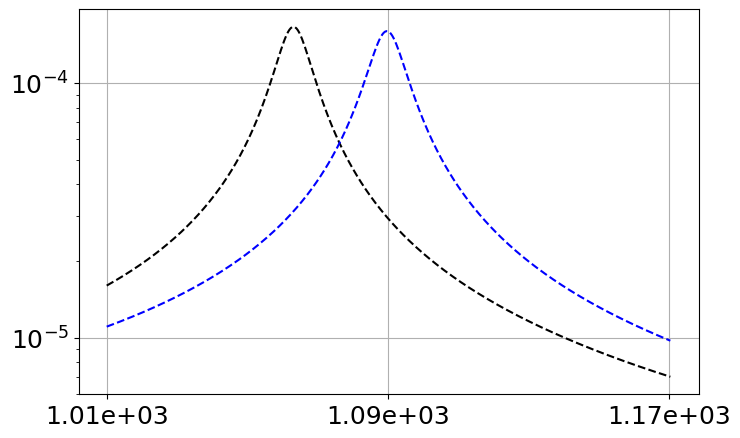

In [32]:
SA1,om1,amp1 = get_frf(T,indices_selection=('blisk', 2, 0),analysis="FRF")
fig, ax = prep_fig(np.linspace(puls_inf,puls_sup,3))
ax.plot(om, amp, "k--")
ax.plot(om1, amp1, "b--")
print(om[np.argmax(amp)]/(2*np.pi),om1[np.argmax(amp1)]/(2*np.pi))

### 2.3 Modify the linear spring connecting ring sectors to the blisk into Jenkins connectors : 

In the next block we will modify the previous input file in order to introduce the friction effects between the blisk and the ring damper. The normal preload is given by the following equation : 

$$ N_{0} = m_{r} \cdot R \cdot \Omega^{2} $$

- Complete the `modify_inp_for_jenkins` function that modifies the "LinkBlisk" connectors into "Jenkins" connectors


In [33]:
######################### Parameters : 
INP_ring_fric = copy.deepcopy(INP_ring_stuck)
INP_ring_fric["analysis"]["FRF"]["solver"] = "scipyroot"
INP_ring_fric["analysis"]["FRF"]["reductors"] = [{"type":"AllgowerPreconditioner"}]
OMEGA_ROT = pd_diam["freq"].iloc[1] * (2*np.pi) / 2.
radius_ring = 10e-2


######################### Functions to complete :   

def modify_inp_for_jenkins(inp=INP_ring_fric, mu=.1, mr=mr, radius_ring=radius_ring, omega_rot=OMEGA_ROT) : 
    for k,c in INP_ring_fric["connectors"].items() : 
        if "LinkBlisk" in k :
            # change type of connector to Jenkins
            # Add mu parameter =.1
            # Add N_0 normal preload
            pass
    return inp

######################### Modify INP_stuck_ring accordingly : 
from Tuto_006_LumpedBladedDisk_correctionfunctions import modify_inp_for_jenkins_corr
INP_ring_fric = modify_inp_for_jenkins_corr(INP_ring_fric, mu=0.1, mr=mr, radius_ring=radius_ring, omega_rot=OMEGA_ROT)

In [34]:
NL = pyHarm.Maestro(INP_ring_fric)
NL.operate()

solution converged at om=1010.8195190228167
solution converged at om=1011.218526727694
solution converged at om=1011.6175344325712
solution converged at om=1012.0165421374485
solution converged at om=1012.4155498423257
solution converged at om=1012.814557547203
solution converged at om=1013.2135652520802
solution converged at om=1013.6125729569575
solution converged at om=1014.0115806618347
solution converged at om=1014.410588366712
solution converged at om=1014.8095960715892
solution converged at om=1015.2086037764665
solution converged at om=1015.6076114813437
solution converged at om=1016.006619186221
solution converged at om=1016.4056268910982
solution converged at om=1016.8046345959755
solution converged at om=1017.2036423008527
solution converged at om=1017.60265000573
solution converged at om=1018.0016577106072
solution converged at om=1018.4006654154845
solution converged at om=1018.7996731203617
solution converged at om=1019.198680825239
solution converged at om=1019.597688530

solution converged at om=1085.8329675274383
solution converged at om=1086.2319752321628
solution converged at om=1086.6309829368947
solution converged at om=1087.0299906416305
solution converged at om=1087.4289983463727
solution converged at om=1087.82800605112
solution converged at om=1088.2270137558717
solution converged at om=1088.6260214606284
solution converged at om=1089.0250291653883
solution converged at om=1089.4240368701526
solution converged at om=1089.8230445749186
solution converged at om=1090.222052279688
solution converged at om=1090.62105998446
solution converged at om=1091.020067689235
solution converged at om=1091.4190753940122
solution converged at om=1091.8180830987912
solution converged at om=1092.2170908035723
solution converged at om=1092.6160985083543
solution converged at om=1093.015106213138
solution converged at om=1093.4141139179235
solution converged at om=1093.8131216227102
solution converged at om=1094.212129327498
solution converged at om=1094.6111370322

solution converged at om=1161.2454237427417
solution converged at om=1161.644431447619
solution converged at om=1162.0434391524961
solution converged at om=1162.4424468573734
solution converged at om=1162.8414545622506
solution converged at om=1163.240462267128
solution converged at om=1163.6394699720051
solution converged at om=1164.0384776768824
solution converged at om=1164.4374853817596
solution converged at om=1164.836493086637
solution converged at om=1165.2355007915141
solution converged at om=1165.6345084963914
solution converged at om=1166.0335162012686
solution converged at om=1166.432523906146
solution converged at om=1166.8315316110231
solution converged at om=1167.2305393159004
solution converged at om=1167.6295470207776
solution converged at om=1168.0285547256549
solution converged at om=1168.4275624305321
solution converged at om=1168.8265701354094
solution converged at om=1169.2255778402866
solution converged at om=1169.6245855451639
solution converged at om=1170.023593

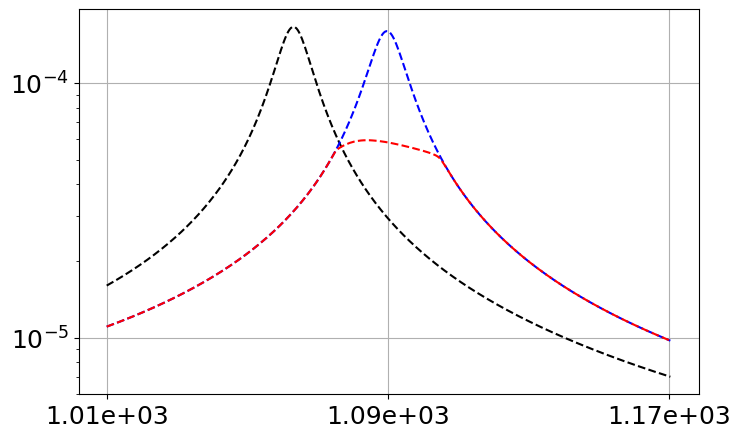

In [35]:
SA2,om2,amp2 = get_frf(NL,indices_selection=('blisk', 2, 0),analysis="FRF")
fig, ax = prep_fig(np.linspace(puls_inf,puls_sup,3))
ax.plot(om, amp, "k--")
ax.plot(om1, amp1, "b--")
ax.plot(om2, amp2, "r--")

## 3. Cut in the ring and effect over the response : 

In this section, we will introduce the cut into the ring damper that is mandatory for it to be mounted to the disk. This will be done by suppressing a sector of ring and its connections. The results will introduce mistuning into the system, thus inducing localization of the vibration energy in some blades.

In [36]:
INP_ring_cut = copy.deepcopy(INP_ring_fric)
kick_ring_sector = "000"
sub_to_kick = f"ring_{kick_ring_sector}"
connectors_to_kick = [ 
    f"LinkBlisk_{kick_ring_sector}",
    f"SpringGround_{kick_ring_sector}",
    f"Spring_{kick_ring_sector}_001",
    f"Spring_023_{kick_ring_sector}"
]

INP_ring_cut["substructures"].pop(sub_to_kick)
for c in connectors_to_kick : 
    INP_ring_cut["connectors"].pop(c)

In [37]:
NL_cut = pyHarm.Maestro(INP_ring_cut)
NL_cut.operate()

solution converged at om=1010.8195190228167
solution converged at om=1011.218526727694
solution converged at om=1011.6175344325712
solution converged at om=1012.0165421374485
solution converged at om=1012.4155498423257
solution converged at om=1012.814557547203
solution converged at om=1013.2135652520802
solution converged at om=1013.6125729569575
solution converged at om=1014.0115806618347
solution converged at om=1014.410588366712
solution converged at om=1014.8095960715892
solution converged at om=1015.2086037764665
solution converged at om=1015.6076114813437
solution converged at om=1016.006619186221
solution converged at om=1016.4056268910982
solution converged at om=1016.8046345959755
solution converged at om=1017.2036423008527
solution converged at om=1017.60265000573
solution converged at om=1018.0016577106071
solution converged at om=1018.4006654154842
solution converged at om=1018.7996731203614
solution converged at om=1019.1986808252385
solution converged at om=1019.59768853

solution converged at om=1085.8329675257767
solution converged at om=1086.2319752305511
solution converged at om=1086.6309829353295
solution converged at om=1087.0299906401121
solution converged at om=1087.428998344896
solution converged at om=1087.8280060496857
solution converged at om=1088.2270137544756
solution converged at om=1088.626021459266
solution converged at om=1089.0250291640639
solution converged at om=1089.4240368688595
solution converged at om=1089.8230445736579
solution converged at om=1090.2220522784598
solution converged at om=1090.621059983261
solution converged at om=1091.020067688065
solution converged at om=1091.4190753928708
solution converged at om=1091.8180830976767
solution converged at om=1092.2170908024839
solution converged at om=1092.616098507294
solution converged at om=1093.0151062121017
solution converged at om=1093.4141139169128
solution converged at om=1093.8131216217243
solution converged at om=1094.2121293265336
solution converged at om=1094.6111370

solution converged at om=1160.846416039015
solution converged at om=1161.2454237438922
solution converged at om=1161.6444314487694
solution converged at om=1162.0434391536467
solution converged at om=1162.442446858524
solution converged at om=1162.8414545634012
solution converged at om=1163.2404622682784
solution converged at om=1163.6394699731557
solution converged at om=1164.038477678033
solution converged at om=1164.4374853829102
solution converged at om=1164.8364930877874
solution converged at om=1165.2355007926647
solution converged at om=1165.634508497542
solution converged at om=1166.0335162024192
solution converged at om=1166.4325239072964
solution converged at om=1166.8315316121736
solution converged at om=1167.230539317051
solution converged at om=1167.6295470219281
solution converged at om=1168.0285547268054
solution converged at om=1168.4275624316826
solution converged at om=1168.82657013656
solution converged at om=1169.2255778414371
solution converged at om=1169.624585546

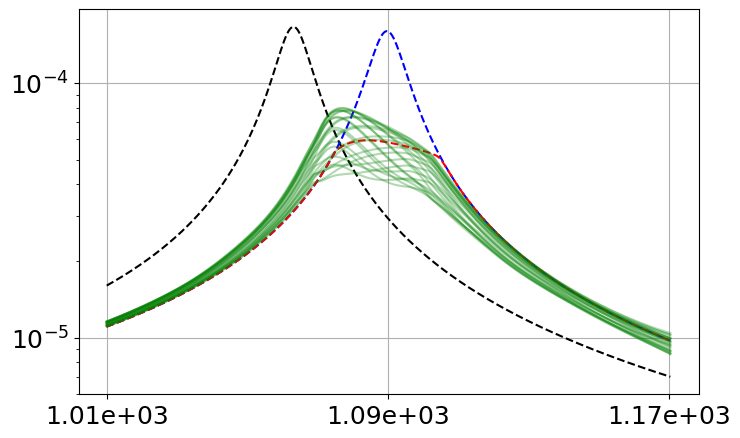

In [38]:
AMP3 = []
for s in range(N_SECTOR) :
    SA3,om3,amp3 = get_frf(NL_cut,indices_selection=('blisk', 2 + s*3, 0),analysis="FRF")
    AMP3.append(amp3)
fig, ax = prep_fig(np.linspace(puls_inf,puls_sup,3))
ax.plot(om, amp, "k--")
ax.plot(om1, amp1, "b--")
ax.plot(om2, amp2, "r--")
for s in range(N_SECTOR) :
    ax.plot(om3, AMP3[s], "g", alpha=.3)

# Conclusion 

This concludes Tutorial 006 of pyHarm. Throughout this tutorial, you should have learned more about the construction of an input dictionary or file for pyHarm. Additionally, you should now feel more confident in building connectors of different types or substructures.

This tutorial also demonstrated the process of conducting a forced response analysis on a bladed disk, starting from modal analysis and then adding a damping system to reduce the amplitude experienced at the tip of the blades. It also highlighted the effect of mistuning, which localizes vibration energy when the system loses its cyclic symmetry. This effect can arise from manufacturing uncertainties as well.

It is hoped this tutorial has provided you with valuable insights and skills for your vibration analysis endeavors. If you have any further questions or need assistance with anything else, feel free to ask.